<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(1_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,34.648748,30.677440,-1.953534,73.372655,77.728482,-4.355828
1,0.0,1.0,44.202932,56.944018,12.450113,123.597062,108.638003,14.959060
2,0.0,2.0,41.462639,22.311902,7.380209,81.154750,77.064439,4.090310
3,0.0,3.0,99.266975,63.990155,-24.323385,148.933745,165.827106,-16.893360
4,0.0,4.0,57.454979,29.992733,-15.222258,82.225454,98.395542,-16.170088
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,34.840447,48.900388,-3.336177,90.404657,98.081380,-7.676723
29996,999.0,26.0,83.242181,46.977344,-11.547913,128.671611,140.920818,-12.249207
29997,999.0,27.0,52.055347,90.975044,-12.309015,140.721375,155.517146,-14.795771
29998,999.0,28.0,46.818508,85.351471,20.668029,162.838007,145.126781,17.711226


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    34.648748  30.677440  -1.953534   73.372655   77.728482   
      1.0    44.202932  56.944018  12.450113  123.597062  108.638003   
      2.0    41.462639  22.311902   7.380209   81.154750   77.064439   
      3.0    99.266975  63.990155 -24.323385  148.933745  165.827106   
      4.0    57.454979  29.992733 -15.222258   82.225454   98.395542   
...                ...        ...        ...         ...         ...   
999.0 25.0   34.840447  48.900388  -3.336177   90.404657   98.081380   
      26.0   83.242181  46.977344 -11.547913  128.671611  140.920818   
      27.0   52.055347  90.975044 -12.309015  140.721375  155.517146   
      28.0   46.818508  85.351471  20.668029  162.838007  145.126781   
      29.0   55.818680  71.962920   5.561028  143.342628  140.232182   

                 e_hat  
rep   index             
0.0   0.0    -4.355828  
      1.0    14.959060  
      2.0     4.090310  
      3.0   -16.893360  
      4.0   -16.170088  
...                ...  
999.0 25.0   -7.676723  
      26.0  -12.249207  
      27.0  -14.795771  
      28.0   17.711226  
      29.0    3.110445  

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    34.648748  30.677440  -1.953534   73.372655   77.728482   
      1.0    44.202932  56.944018  12.450113  123.597062  108.638003   
      2.0    41.462639  22.311902   7.380209   81.154750   77.064439   
      3.0    99.266975  63.990155 -24.323385  148.933745  165.827106   
      4.0    57.454979  29.992733 -15.222258   82.225454   98.395542   
...                ...        ...        ...         ...         ...   
999.0 25.0   34.840447  48.900388  -3.336177   90.404657   98.081380   
      26.0   83.242181  46.977344 -11.547913  128.671611  140.920818   
      27.0   52.055347  90.975044 -12.309015  140.721375  155.517146   
      28.0   46.818508  85.351471  20.668029  162.838007  145.126781   
      29.0   55.818680  71.962920   5.561028  143.342628  140.232182   

                 e_hat  
rep   index             
0.0   0.0    -4.355828  
      1.0    14.959060  
      2.0     4.090310  
      3.0   -16.893360  
      4.0   -16.170088  
...                ...  
999.0 25.0   -7.676723  
      26.0  -12.249207  
      27.0  -14.795771  
      28.0   17.711226  
      29.0    3.110445  

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,34.648748,30.677440,-1.953534,73.372655,77.728482,-4.355828
1,0.0,1.0,44.202932,56.944018,12.450113,123.597062,108.638003,14.959060
2,0.0,2.0,41.462639,22.311902,7.380209,81.154750,77.064439,4.090310
3,0.0,3.0,99.266975,63.990155,-24.323385,148.933745,165.827106,-16.893360
4,0.0,4.0,57.454979,29.992733,-15.222258,82.225454,98.395542,-16.170088
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,34.840447,48.900388,-3.336177,90.404657,98.081380,-7.676723
29996,999.0,26.0,83.242181,46.977344,-11.547913,128.671611,140.920818,-12.249207
29997,999.0,27.0,52.055347,90.975044,-12.309015,140.721375,155.517146,-14.795771
29998,999.0,28.0,46.818508,85.351471,20.668029,162.838007,145.126781,17.711226


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    34.648748  30.677440  -1.953534   73.372655   77.728482   
      1.0    44.202932  56.944018  12.450113  123.597062  108.638003   
      2.0    41.462639  22.311902   7.380209   81.154750   77.064439   
      3.0    99.266975  63.990155 -24.323385  148.933745  165.827106   
      4.0    57.454979  29.992733 -15.222258   82.225454   98.395542   
...                ...        ...        ...         ...         ...   
999.0 25.0   34.840447  48.900388  -3.336177   90.404657   98.081380   
      26.0   83.242181  46.977344 -11.547913  128.671611  140.920818   
      27.0   52.055347  90.975044 -12.309015  140.721375  155.517146   
      28.0   46.818508  85.351471  20.668029  162.838007  145.126781   
      29.0   55.818680  71.962920   5.561028  143.342628  140.232182   

                 e_hat  
rep   index             
0.0   0.0    -4.355828  
      1.0    14.959060  
      2.0     4.090310  
      3.0   -16.893360  
      4.0   -16.170088  
...                ...  
999.0 25.0   -7.676723  
      26.0  -12.249207  
      27.0  -14.795771  
      28.0   17.711226  
      29.0    3.110445  

[30000 rows x 6 columns]

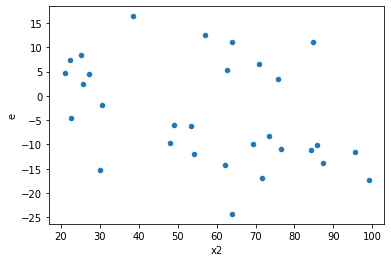

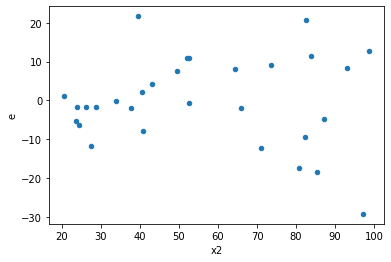

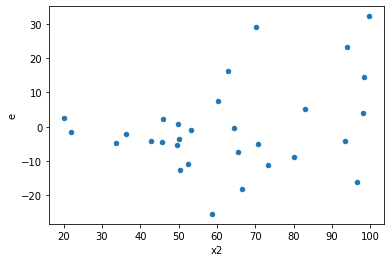

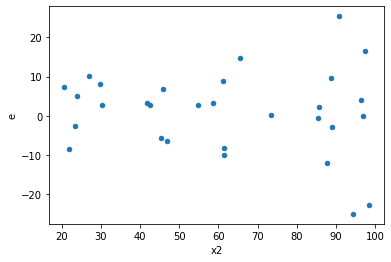

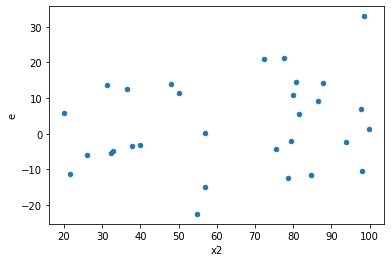

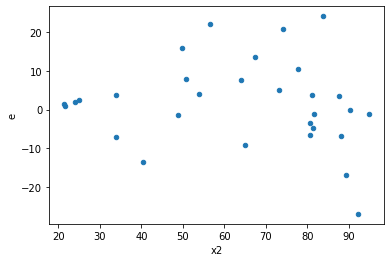

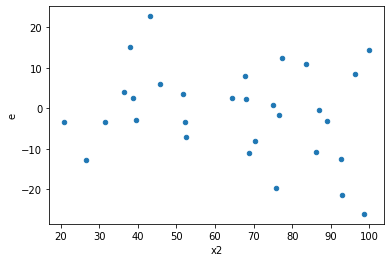

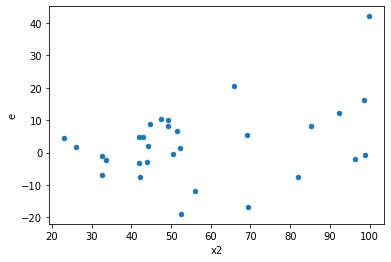

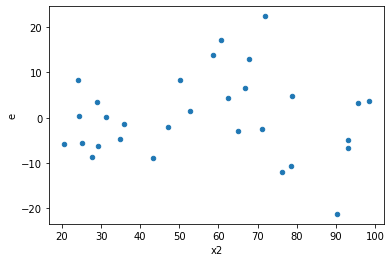

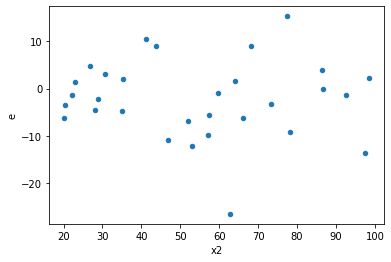

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,13.0,13.0,1193.6592732129127,1509.5520322445864,91.81994409330098,116.11938709573741,1.2646423197311583,0.6783232412265106,0.6608383793867447,0.3391616206132553,Reject001=1 : Homoscedasticity
2.0,9.0,17.0,354.1305891991358,3030.568645129677,39.34784324434842,178.26874383115748,4.530584884262048,0.0072691329566327845,0.9963654335216836,0.0036345664783163922,Reject001=0 : Heteroscedasticity
4.0,12.0,14.0,1567.394727465103,2461.751902456745,130.61622728875858,175.83942160405323,1.346229524876093,0.5894385579102008,0.7052807210448996,0.2947192789551004,Reject001=1 : Homoscedasticity
9.0,13.0,13.0,459.6359233362557,1065.9424052197262,35.356609487404285,81.99556963228663,2.3191015999850713,0.14239677734266487,0.9288016113286676,0.07119838867133244,Reject001=1 : Homoscedasticity
12.0,12.0,14.0,844.6863938906422,3854.151409214709,70.39053282422019,275.2965292296221,3.910988000575231,0.017615491419077367,0.9911922542904613,0.008807745709538684,Reject001=1 : Homoscedasticity
14.0,14.0,12.0,1650.6133166085015,2493.448870915469,117.90095118632154,207.7874059096224,1.7623895636028524,0.33137772864469084,0.8343111356776546,0.16568886432234542,Reject001=1 : Homoscedasticity
21.0,17.0,9.0,1260.8182059675246,1293.3497123290513,74.16577682161909,143.7055235921168,1.937625812748544,0.31356511615706006,0.84321744192147,0.15678255807853003,Reject001=1 : Homoscedasticity
24.0,14.0,12.0,1168.6959299744613,1135.4571360371233,83.47828071246151,94.62142800309361,1.1334855868559912,0.8367263466361647,0.5816368266819176,0.41836317331808237,Reject001=1 : Homoscedasticity
25.0,14.0,12.0,452.84816587007657,1317.3790582978222,32.34629756214833,109.78158819148518,3.3939460298526316,0.040347463004009265,0.9798262684979954,0.020173731502004633,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,13.0,13.0,1193.6592732129127,1509.5520322445864,91.81994409330098,116.11938709573741,1.2646423197311583,0.6783232412265106,Reject001=1 : Homoscedasticity
1.0,9.0,17.0,1973.9018441795881,880.2531855182556,219.32242713106535,51.77959914813268,0.23608893912700318,0.03268842333113859,Reject001=1 : Homoscedasticity
2.0,9.0,17.0,354.1305891991358,3030.568645129677,39.34784324434842,178.26874383115748,4.530584884262048,0.0072691329566327845,Reject001=0 : Heteroscedasticity
3.0,10.0,16.0,2206.6894114901074,861.2498541728021,220.66894114901075,53.82811588580013,0.2439315456245005,0.028604667221085647,Reject001=1 : Homoscedasticity
4.0,12.0,14.0,1567.394727465103,2461.751902456745,130.61622728875858,175.83942160405323,1.346229524876093,0.5894385579102008,Reject001=1 : Homoscedasticity
5.0,16.0,10.0,2193.4377651094687,725.7743999386477,137.0898603193418,72.57743999386477,0.5294150845642442,0.2476055103154458,Reject001=1 : Homoscedasticity
6.0,16.0,10.0,2384.345784663906,976.0225996132455,149.02161154149414,97.60225996132455,0.6549537275279553,0.4345242166013083,Reject001=1 : Homoscedasticity
7.0,7.0,19.0,2147.1891135855935,1089.9752967442037,306.7413019407991,57.36712088127388,0.1870211820785246,0.030466492611976627,Reject001=1 : Homoscedasticity
8.0,15.0,11.0,1684.8289729800824,469.5000252994275,112.3219315320055,42.68182048176613,0.37999542831583333,0.08376388360704282,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      902
Reject001=0 : Heteroscedasticity     98
Name: Result_test, dtype: int64